<a href="https://colab.research.google.com/github/ZYCMEL/Encephaloma_lol/blob/main/PF_Final_Project_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/brain_stroke.csv')
'''
LINK TO THE DATAFRAME

https://drive.google.com/file/d/15G9Ksaq_29WPXOO0Z-ND7RsWG4N8SiD6/view?usp=sharing

'''

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df['work_type'] = df['work_type'].replace({'Self-employed': 'Self_Employed', 'Govt_job': 'Government', 'children': 'Stay_at_Home'})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,1,Self_Employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,0,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,1,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,1,Government,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,1,Private,Rural,83.94,30.0,smokes,0


In [ ]:
AS_35 = df[(df['age']>= 35)&(df['stroke']==1)]
BS_35 = df[(df['age']<= 35)&(df['stroke']==1)]
print('Stroke From People Above The Age of 35:\n',len(AS_35))
print('Stroke From People Below The Age of 35:\n',len(BS_35))


Stroke From People Above The Age of 35:
 245
Stroke From People Below The Age of 35:
 3


In [ ]:
AM = df[(df['ever_married'] == 1)&(df['stroke']==1)]
BM = df[(df['ever_married'] == 0)&(df['stroke']==1)]
print('Stroke From People Who Have Married:\n',len(AM))
print('Stroke From People Who Has Never Married:\n',len(BM))

Stroke From People Who Have Married:
 219
Stroke From People Who Has Never Married:
 29


In [1]:
AGM = df[(df['gender'] == 'Male')&(df['stroke']==1)]
BGM = df[(df['gender'] == 'Female')&(df['stroke']==1)]
print('Strokes For Male:\n',len(AGM))
print('Strokes For Female:\n',len(BGM))

NameError: name 'df' is not defined

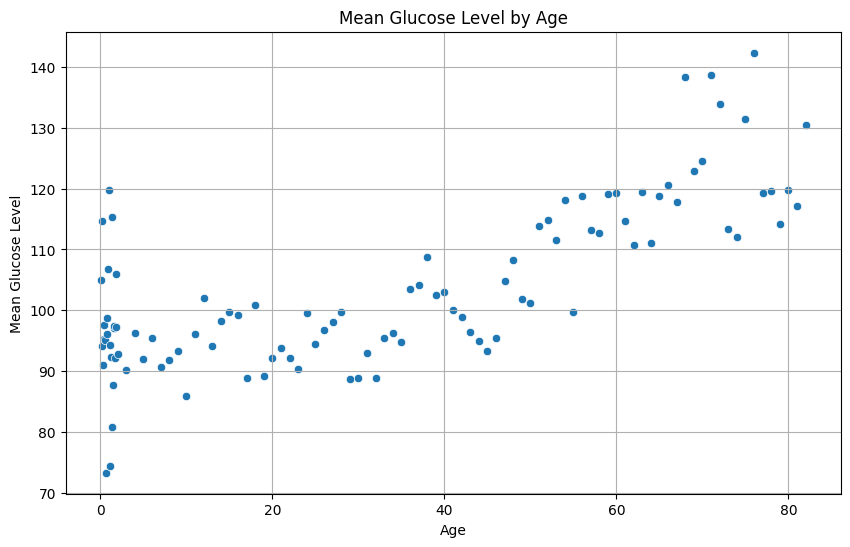

Correlation Between The Average Glucose Level and Age:
                         age  avg_glucose_level
age                1.000000           0.236763
avg_glucose_level  0.236763           1.000000


In [ ]:
GA = df.groupby('age')['avg_glucose_level'].mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=GA.index, y=GA.values)
plt.xlabel('Age')
plt.ylabel('Mean Glucose Level')
plt.title('Mean Glucose Level by Age')
plt.grid(True)
plt.show()
CORR = df[['age','avg_glucose_level']].corr()
print("Correlation Between The Average Glucose Level and Age:\n" ,CORR)

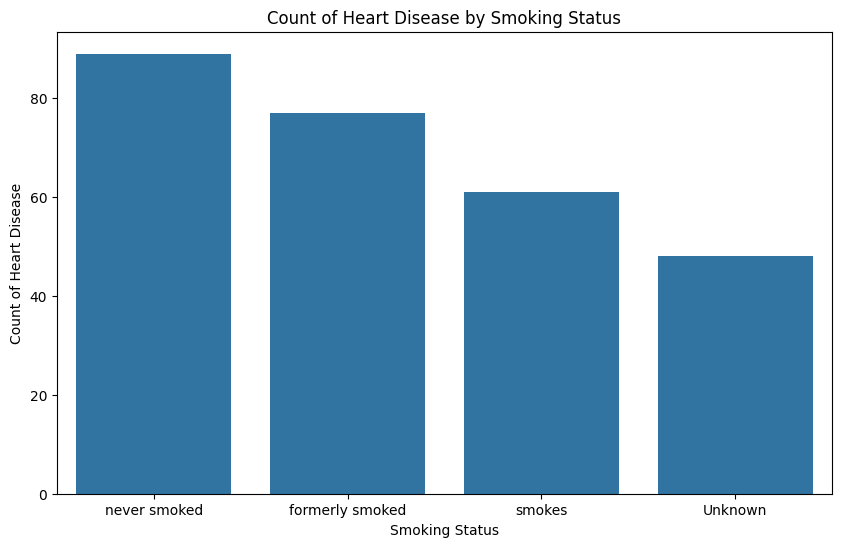

In [ ]:
HD = df[df['heart_disease'] == 1]

plt.figure(figsize=(10, 6))
SO = ['never smoked','formerly smoked', 'smokes', 'Unknown']
sns.countplot(x='smoking_status', data=HD, order = SO)
plt.xlabel('Smoking Status')
plt.ylabel('Count of Heart Disease')
plt.title('Count of Heart Disease by Smoking Status')
plt.show()
#It's funny because there is actually an inverse correlation with smoking and heart disease

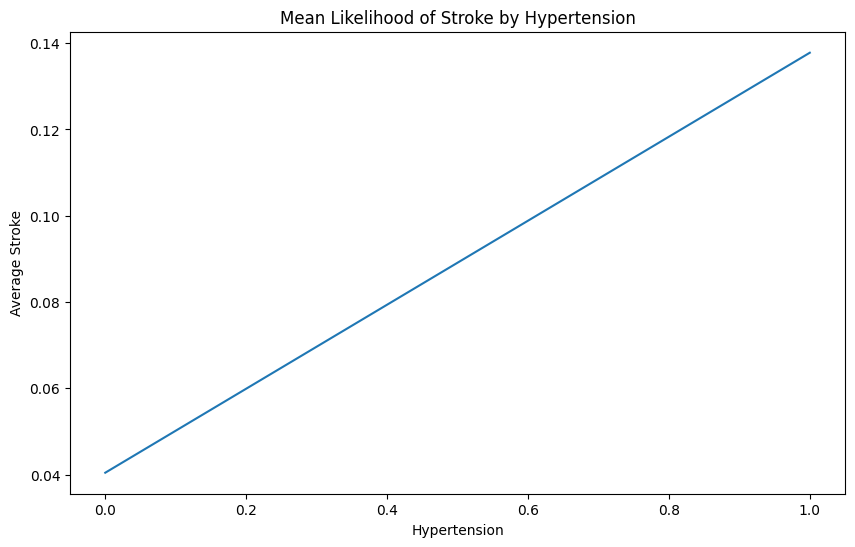

In [ ]:
BSS = df.groupby('hypertension')['stroke'].agg('mean').reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='hypertension', y='stroke', data=BSS)
plt.xlabel('Hypertension')
plt.ylabel('Average Stroke')
plt.title('Mean Likelihood of Stroke by Hypertension')
plt.show()

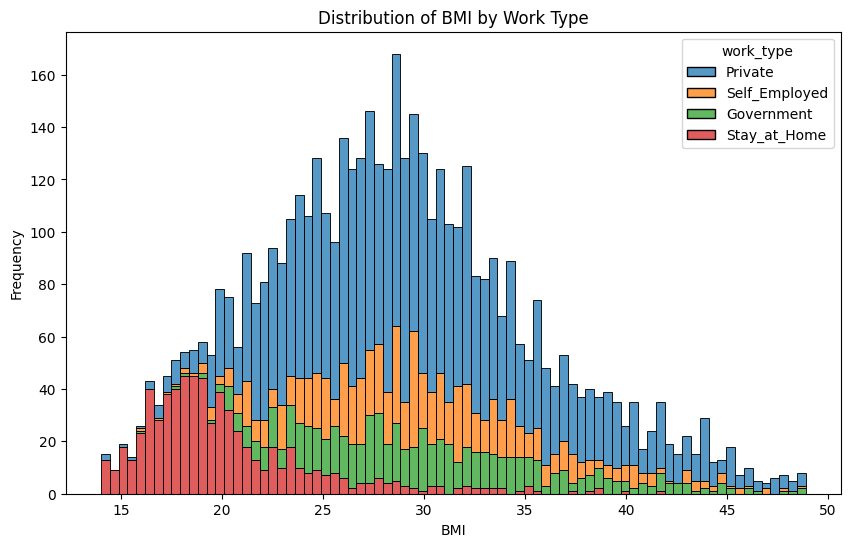

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='work_type', bins=80, multiple='stack')
plt.title('Distribution of BMI by Work Type')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [ ]:
CORR = df[['ever_married','bmi']].corr()
print("Correlation of The Most Important:\n" ,CORR)
# Suprisingly, BMI has the strongest correlations with marriage.

Correlation of The Most Important:
               ever_married      bmi
ever_married       1.00000  0.37169
bmi                0.37169  1.00000
